In [2]:
import pandas as pd
file_path = 'global_power_plant_database.csv'
power_plant_data = pd.read_csv(file_path)
power_plant_data.info(), power_plant_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         34936 non-null  object 
 1   country_long                    34936 non-null  object 
 2   name                            34936 non-null  object 
 3   gppd_idnr                       34936 non-null  object 
 4   capacity_mw                     34936 non-null  float64
 5   latitude                        34936 non-null  float64
 6   longitude                       34936 non-null  float64
 7   primary_fuel                    34936 non-null  object 
 8   other_fuel1                     1944 non-null   object 
 9   other_fuel2                     276 non-null    object 
 10  other_fuel3                     92 non-null     object 
 11  commissioning_year              17447 non-null  float64
 12  owner                           

/tmp/ipykernel_16225/934742290.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  power_plant_data = pd.read_csv(file_path)


(None,
   country country_long                                              name  \
 0     AFG  Afghanistan      Kajaki Hydroelectric Power Plant Afghanistan   
 1     AFG  Afghanistan                                      Kandahar DOG   
 2     AFG  Afghanistan                                      Kandahar JOL   
 3     AFG  Afghanistan     Mahipar Hydroelectric Power Plant Afghanistan   
 4     AFG  Afghanistan  Naghlu Dam Hydroelectric Power Plant Afghanistan   
 
       gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
 0  GEODB0040538         33.0    32.322    65.1190        Hydro         NaN   
 1    WKS0070144         10.0    31.670    65.7950        Solar         NaN   
 2    WKS0071196         10.0    31.623    65.7920        Solar         NaN   
 3  GEODB0040541         66.0    34.556    69.4787        Hydro         NaN   
 4  GEODB0040534        100.0    34.641    69.7170        Hydro         NaN   
 
   other_fuel2  ... estimated_generation_gwh_2013  \


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

country_aggregates = power_plant_data.groupby("country_long").agg(
    total_capacity_mw=("capacity_mw", "sum"),
    total_generation_2019=("generation_gwh_2019", "sum")
).sort_values(by="total_capacity_mw", ascending=False).reset_index()

fuel_aggregates = power_plant_data.groupby("primary_fuel").agg(
    total_capacity_mw=("capacity_mw", "sum"),
    total_generation_2019=("generation_gwh_2019", "sum")
).sort_values(by="total_capacity_mw", ascending=False).reset_index()

yearly_columns = [f"generation_gwh_{year}" for year in range(2013, 2020)]
generation_trends = (
    power_plant_data[yearly_columns].sum().reset_index()
)
generation_trends.columns = ["year", "total_generation_gwh"]
generation_trends["year"] = generation_trends["year"].str.extract(r"(\d{4})").astype(int)


In [4]:
max_estimated_generation_2017 = power_plant_data.loc[power_plant_data['estimated_generation_gwh_2017'].idxmax()]
max_estimated_generation_2017[['name', 'country_long', 'estimated_generation_gwh_2017']]

name                             Three Gorges Dam
country_long                                China
estimated_generation_gwh_2017            82810.77
Name: 8453, dtype: object

/tmp/ipykernel_16225/3159573273.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x="total_capacity_mw", y="country_long", palette="viridis")


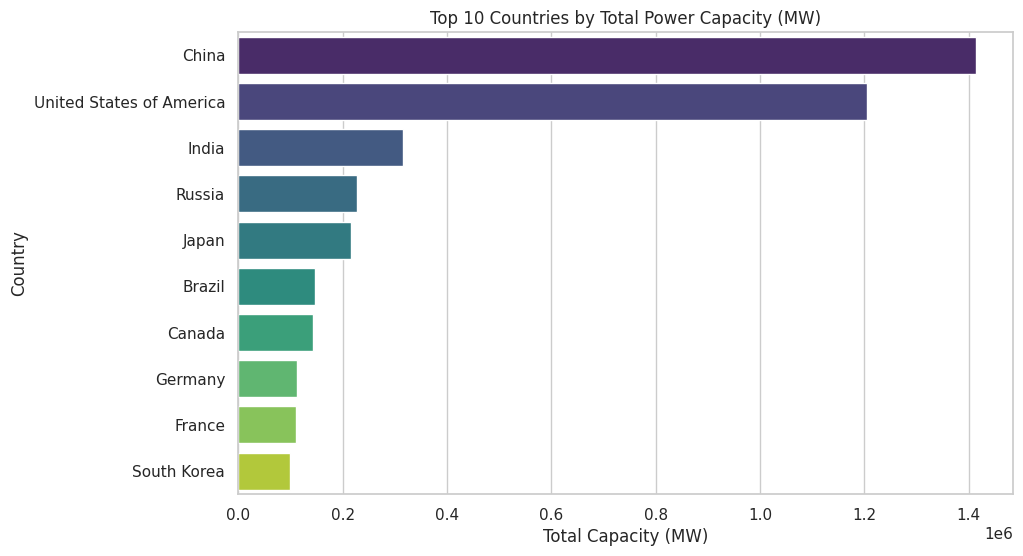

In [5]:
plt.figure(figsize=(10, 6))
top_countries = country_aggregates.head(10)
sns.barplot(data=top_countries, x="total_capacity_mw", y="country_long", palette="viridis")
plt.title("Top 10 Countries by Total Power Capacity (MW)")
plt.xlabel("Total Capacity (MW)")
plt.ylabel("Country")
plt.show()


/tmp/ipykernel_16225/1265170579.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fuel_aggregates, x="total_capacity_mw", y="primary_fuel", palette="coolwarm")


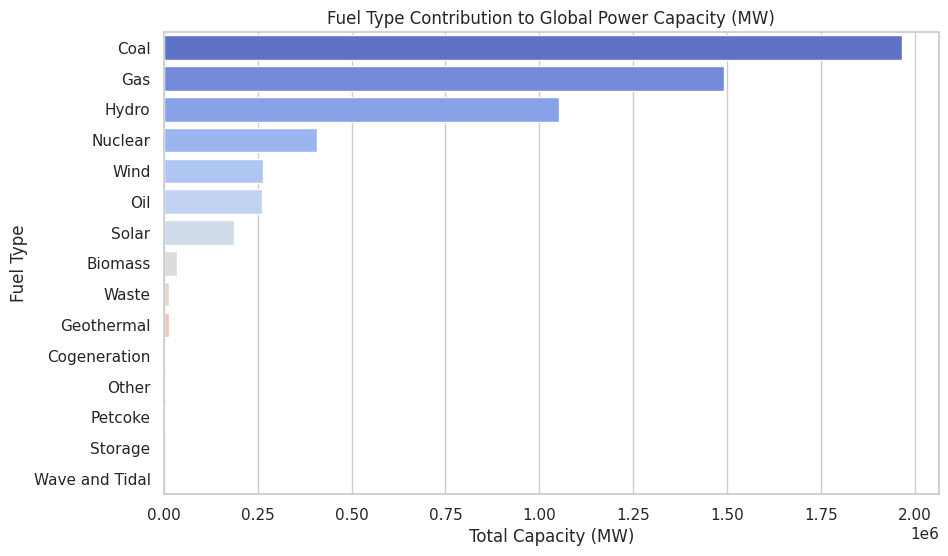

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(data=fuel_aggregates, x="total_capacity_mw", y="primary_fuel", palette="coolwarm")
plt.title("Fuel Type Contribution to Global Power Capacity (MW)")
plt.xlabel("Total Capacity (MW)")
plt.ylabel("Fuel Type")
plt.show()


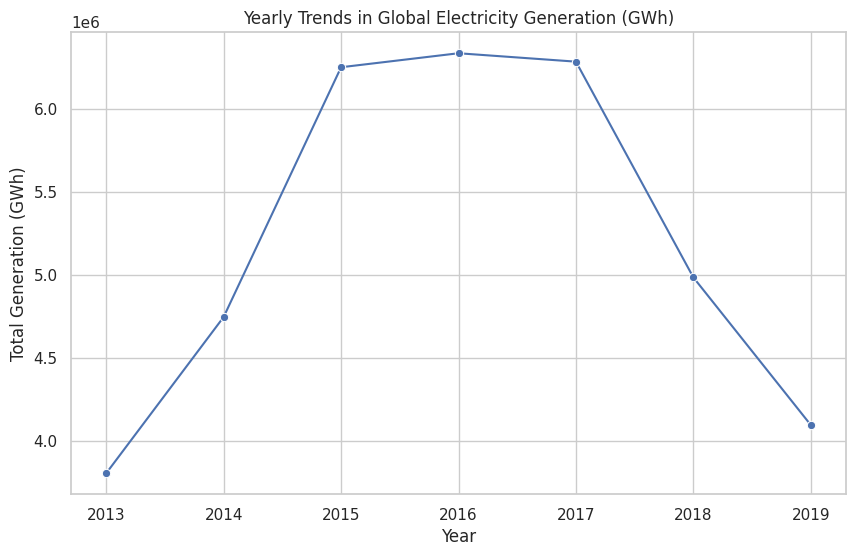

In [7]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=generation_trends, x="year", y="total_generation_gwh", marker="o")
plt.title("Yearly Trends in Global Electricity Generation (GWh)")
plt.xlabel("Year")
plt.ylabel("Total Generation (GWh)")
plt.xticks(generation_trends["year"])
plt.grid(True)
plt.show()

In [8]:
usa_power_plants = power_plant_data[power_plant_data['country'] == 'USA']

In [9]:
usa_power_plants.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
24710,USA,United States of America,100 Brook Hill Drive Solar,USA0063292,2.0,41.0930,-73.9828,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,3.25,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
24711,USA,United States of America,1025 Traveller Solar LLC,USA0062660,5.0,35.4273,-79.1263,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,8.14,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
24712,USA,United States of America,1047 Little Mountain Solar LLC,USA0062661,3.0,36.1971,-80.8067,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,4.88,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
24713,USA,United States of America,12 Applegate Solar LLC,USA0059371,1.9,40.2003,-74.5761,Solar,NaN,NaN,...,2.92,2.94,3.06,2.85,2.61,SOLAR-V1,SOLAR-V1,SOLAR-V1,SOLAR-V1,SOLAR-V1
24714,USA,United States of America,126 Grove Solar LLC,USA0060858,2.0,42.0761,-71.4227,Solar,NaN,NaN,...,3.01,2.98,3.11,2.98,2.64,SOLAR-V1,SOLAR-V1,SOLAR-V1,SOLAR-V1,SOLAR-V1


In [10]:
usa_power_plants_df = usa_power_plants[["name", "latitude", "longitude", "estimated_generation_gwh_2017"]]
usa_power_plants_df

,name,latitude,longitude,estimated_generation_gwh_2017
24710,100 Brook Hill Drive Solar,41.0930,-73.9828,3.25
24711,1025 Traveller Solar LLC,35.4273,-79.1263,8.14
24712,1047 Little Mountain Solar LLC,36.1971,-80.8067,4.88
24713,12 Applegate Solar LLC,40.2003,-74.5761,2.61
24714,126 Grove Solar LLC,42.0761,-71.4227,2.64
...,...,...,...,...
34538,Zion Landfill Gas to Energy Facility,42.4803,-87.8861,1.26
34539,Zorn,38.2803,-85.7023,63.47
34540,Zotos International WPGF,42.8869,-76.9683,6.81
34541,Zumbro Community Solar Garden,44.3195,-92.6703,1.62


In [11]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, shape
import json

with open('us-states.json', 'r') as file:
    states_data = json.load(file)
    
states_gdf = gpd.GeoDataFrame({
    "id": [feature["id"] for feature in states_data["features"]],
    "name": [feature["properties"]["name"] for feature in states_data["features"]],
    "geometry": [shape(feature["geometry"]) for feature in states_data["features"]]
}, crs="EPSG:4326")

In [12]:
power_plants_gdf = gpd.GeoDataFrame(
    usa_power_plants,
    geometry=gpd.points_from_xy(usa_power_plants['longitude'], usa_power_plants['latitude']),
    crs="EPSG:4326"
)
power_plants_gdf

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017,geometry
24710,USA,United States of America,100 Brook Hill Drive Solar,USA0063292,2.0,41.0930,-73.9828,Solar,NaN,NaN,...,NaN,NaN,NaN,3.25,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,POINT (-73.98280 41.09300)
24711,USA,United States of America,1025 Traveller Solar LLC,USA0062660,5.0,35.4273,-79.1263,Solar,NaN,NaN,...,NaN,NaN,NaN,8.14,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,POINT (-79.12630 35.42730)
24712,USA,United States of America,1047 Little Mountain Solar LLC,USA0062661,3.0,36.1971,-80.8067,Solar,NaN,NaN,...,NaN,NaN,NaN,4.88,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,POINT (-80.80670 36.19710)
24713,USA,United States of America,12 Applegate Solar LLC,USA0059371,1.9,40.2003,-74.5761,Solar,NaN,NaN,...,2.94,3.06,2.85,2.61,SOLAR-V1,SOLAR-V1,SOLAR-V1,SOLAR-V1,SOLAR-V1,POINT (-74.57610 40.20030)
24714,USA,United States of America,126 Grove Solar LLC,USA0060858,2.0,42.0761,-71.4227,Solar,NaN,NaN,...,2.98,3.11,2.98,2.64,SOLAR-V1,SOLAR-V1,SOLAR-V1,SOLAR-V1,SOLAR-V1,POINT (-71.42270 42.07610)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34538,USA,United States of America,Zion Landfill Gas to Energy Facility,USA0056871,7.0,42.4803,-87.8861,Waste,NaN,NaN,...,NaN,NaN,NaN,1.26,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,POINT (-87.88610 42.48030)
34539,USA,United States of America,Zorn,USA0001368,18.0,38.2803,-85.7023,Gas,NaN,NaN,...,NaN,NaN,NaN,63.47,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,POINT (-85.70230 38.28030)
34540,USA,United States of America,Zotos International WPGF,USA0057648,3.4,42.8869,-76.9683,Wind,NaN,NaN,...,8.46,6.57,6.52,6.81,WIND-V1,WIND-V1,WIND-V1,WIND-V1,WIND-V1,POINT (-76.96830 42.88690)
34541,USA,United States of America,Zumbro Community Solar Garden,USA0061574,1.0,44.3195,-92.6703,Solar,NaN,NaN,...,NaN,NaN,NaN,1.62,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,POINT (-92.67030 44.31950)


In [13]:
power_plants_with_states = gpd.sjoin(power_plants_gdf, states_gdf, how='left', predicate='intersects')
power_plants_with_states

,country,country_long,name_left,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017,geometry,index_right,id,name_right
24710,USA,United States of America,100 Brook Hill Drive Solar,USA0063292,2.0,41.0930,-73.9828,Solar,NaN,NaN,...,3.25,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,POINT (-73.98280 41.09300),31.0,NY,New York
24711,USA,United States of America,1025 Traveller Solar LLC,USA0062660,5.0,35.4273,-79.1263,Solar,NaN,NaN,...,8.14,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,POINT (-79.12630 35.42730),32.0,NC,North Carolina
24712,USA,United States of America,1047 Little Mountain Solar LLC,USA0062661,3.0,36.1971,-80.8067,Solar,NaN,NaN,...,4.88,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,POINT (-80.80670 36.19710),32.0,NC,North Carolina
24713,USA,United States of America,12 Applegate Solar LLC,USA0059371,1.9,40.2003,-74.5761,Solar,NaN,NaN,...,2.61,SOLAR-V1,SOLAR-V1,SOLAR-V1,SOLAR-V1,SOLAR-V1,POINT (-74.57610 40.20030),29.0,NJ,New Jersey
24714,USA,United States of America,126 Grove Solar LLC,USA0060858,2.0,42.0761,-71.4227,Solar,NaN,NaN,...,2.64,SOLAR-V1,SOLAR-V1,SOLAR-V1,SOLAR-V1,SOLAR-V1,POINT (-71.42270 42.07610),20.0,MA,Massachusetts
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34538,USA,United States of America,Zion Landfill Gas to Energy Facility,USA0056871,7.0,42.4803,-87.8861,Waste,NaN,NaN,...,1.26,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,POINT (-87.88610 42.48030),12.0,IL,Illinois
34539,USA,United States of America,Zorn,USA0001368,18.0,38.2803,-85.7023,Gas,NaN,NaN,...,63.47,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,POINT (-85.70230 38.28030),16.0,KY,Kentucky
34540,USA,United States of America,Zotos International WPGF,USA0057648,3.4,42.8869,-76.9683,Wind,NaN,NaN,...,6.81,WIND-V1,WIND-V1,WIND-V1,WIND-V1,WIND-V1,POINT (-76.96830 42.88690),31.0,NY,New York
34541,USA,United States of America,Zumbro Community Solar Garden,USA0061574,1.0,44.3195,-92.6703,Solar,NaN,NaN,...,1.62,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,POINT (-92.67030 44.31950),22.0,MN,Minnesota


In [14]:
power_plants_with_states_sorted = power_plants_with_states.sort_values(by='name_right')

state_generation_sums = power_plants_with_states_sorted.groupby('name_right')['estimated_generation_gwh_2017'].sum()

state_generation_sums_df = state_generation_sums.reset_index().rename(columns={'name_right': 'State', 'estimated_generation_gwh_2017': 'Total Estimated Generation (GWh)'})

In [15]:
power_plants_with_states

,country,country_long,name_left,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017,geometry,index_right,id,name_right
24710,USA,United States of America,100 Brook Hill Drive Solar,USA0063292,2.0,41.0930,-73.9828,Solar,NaN,NaN,...,3.25,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,POINT (-73.98280 41.09300),31.0,NY,New York
24711,USA,United States of America,1025 Traveller Solar LLC,USA0062660,5.0,35.4273,-79.1263,Solar,NaN,NaN,...,8.14,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,POINT (-79.12630 35.42730),32.0,NC,North Carolina
24712,USA,United States of America,1047 Little Mountain Solar LLC,USA0062661,3.0,36.1971,-80.8067,Solar,NaN,NaN,...,4.88,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,POINT (-80.80670 36.19710),32.0,NC,North Carolina
24713,USA,United States of America,12 Applegate Solar LLC,USA0059371,1.9,40.2003,-74.5761,Solar,NaN,NaN,...,2.61,SOLAR-V1,SOLAR-V1,SOLAR-V1,SOLAR-V1,SOLAR-V1,POINT (-74.57610 40.20030),29.0,NJ,New Jersey
24714,USA,United States of America,126 Grove Solar LLC,USA0060858,2.0,42.0761,-71.4227,Solar,NaN,NaN,...,2.64,SOLAR-V1,SOLAR-V1,SOLAR-V1,SOLAR-V1,SOLAR-V1,POINT (-71.42270 42.07610),20.0,MA,Massachusetts
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34538,USA,United States of America,Zion Landfill Gas to Energy Facility,USA0056871,7.0,42.4803,-87.8861,Waste,NaN,NaN,...,1.26,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,POINT (-87.88610 42.48030),12.0,IL,Illinois
34539,USA,United States of America,Zorn,USA0001368,18.0,38.2803,-85.7023,Gas,NaN,NaN,...,63.47,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,POINT (-85.70230 38.28030),16.0,KY,Kentucky
34540,USA,United States of America,Zotos International WPGF,USA0057648,3.4,42.8869,-76.9683,Wind,NaN,NaN,...,6.81,WIND-V1,WIND-V1,WIND-V1,WIND-V1,WIND-V1,POINT (-76.96830 42.88690),31.0,NY,New York
34541,USA,United States of America,Zumbro Community Solar Garden,USA0061574,1.0,44.3195,-92.6703,Solar,NaN,NaN,...,1.62,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,POINT (-92.67030 44.31950),22.0,MN,Minnesota


In [16]:
power_plants_with_states_sorted_2 = power_plants_with_states.sort_values(by='estimated_generation_gwh_2017', ascending=False)
power_plants_with_states_sorted_2

,country,country_long,name_left,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017,geometry,index_right,id,name_right
31208,USA,United States of America,Palo Verde,USA0006008,4209.6,33.3881,-112.8617,Nuclear,NaN,NaN,...,33395.96,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,POINT (-112.86170 33.38810),2.0,AZ,Arizona
25851,USA,United States of America,Browns Ferry,USA0000046,3494.0,34.7042,-87.1189,Nuclear,NaN,NaN,...,27718.90,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,POINT (-87.11890 34.70420),0.0,AL,Alabama
28190,USA,United States of America,Grand Coulee,USA0006163,6809.0,47.9575,-118.9773,Hydro,NaN,NaN,...,26111.69,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,POINT (-118.97730 47.95750),46.0,WA,Washington
31304,USA,United States of America,Peach Bottom,USA0003166,2876.4,39.7589,-76.2687,Nuclear,NaN,NaN,...,22819.30,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,POINT (-76.26870 39.75890),37.0,PA,Pennsylvania
33524,USA,United States of America,Turkey Point,USA0000621,2861.2,25.4356,-80.3308,Nuclear,Oil,Gas,...,22698.72,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,POINT (-80.33080 25.43560),8.0,FL,Florida
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34449,USA,United States of America,Wooster Renewable Energy,USA0059072,1.0,40.7850,-81.9514,Biomass,Gas,NaN,...,NaN,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,POINT (-81.95140 40.78500),34.0,OH,Ohio
34507,USA,United States of America,Yellowstone Energy LP,USA0050931,68.0,45.8117,-108.4278,Petcoke,Gas,NaN,...,NaN,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,POINT (-108.42780 45.81170),25.0,MT,Montana
34510,USA,United States of America,Yerba Buena,USA0059257,4.0,37.3058,-121.7550,Storage,NaN,NaN,...,NaN,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,POINT (-121.75500 37.30580),4.0,CA,California
34532,USA,United States of America,Zeeland Farm Services,USA0058704,3.2,42.8131,-85.9861,Biomass,NaN,NaN,...,NaN,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,POINT (-85.98610 42.81310),21.0,MI,Michigan


In [17]:
state_generation_sums_df_sorted = state_generation_sums_df.sort_values(by='Total Estimated Generation (GWh)', ascending=False)
state_generation_sums_df_sorted

,State,Total Estimated Generation (GWh)
42,Texas,499339.17
8,Florida,240112.72
4,California,235798.75
12,Illinois,235068.73
37,Pennsylvania,215051.85
32,North Carolina,155581.89
9,Georgia,152961.22
31,New York,149473.69
21,Michigan,128835.95
0,Alabama,128552.37


In [21]:
rail_network_file = 'NTAD_North_American_Rail_Network_Lines_-1010301844461178341.csv'
rail_network_df = pd.read_csv(rail_network_file)

/tmp/ipykernel_16225/236413340.py:2: DtypeWarning: Columns (4,12,16,17,18,19,20,21,22,24,25,27,32) have mixed types. Specify dtype option on import or set low_memory=False.
  rail_network_df = pd.read_csv(rail_network_file)


In [20]:
rail_network_file = 'NTAD_North_American_Rail_Network_Lines_-1010301844461178341.csv'
rail_network_df = pd.read_csv(rail_network_file)

rails_gdf = gpd.GeoDataFrame(rail_network_df, geometry=gpd.points_from_xy(rail_network_df.longitude, rail_network_df.latitude), crs="EPSG:4326")

states = states_gdf.to_crs(epsg=5070)
railways = rails_gdf.to_crs(epsg=5070)
railways["line_geom"] = railways.geometry
state_with_railway = states.sjoin(railways)

def fix_geometry(geom):
    if not geom.is_valid:
        geom = geom.buffer(0)  # Attempt to fix the geometry
    return geom

state_with_railway["geometry"] = state_with_railway["geometry"].apply(fix_geometry)
state_with_railway["line_geom"] = state_with_railway["line_geom"].apply(fix_geometry)

state_with_railway["inside_the_state"] = state_with_railway.apply(lambda row: row["geometry"].intersection(row.line_geom), axis=1)

agg_df = state_with_railway[[
    "name",
    "KM",
    "whole_length",
    "intersection_length"
]].groupby("name").sum(["intersection_length"]).sort_values("intersection_length", ascending=False)

agg_df.loc["Alaska"]


/tmp/ipykernel_16225/2712697300.py:2: DtypeWarning: Columns (4,12,16,17,18,19,20,21,22,24,25,27,32) have mixed types. Specify dtype option on import or set low_memory=False.
  rail_network_df = pd.read_csv(rail_network_file)


AttributeError: 'DataFrame' object has no attribute 'longitude'